In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Paper

/content/drive/My Drive/Colab Notebooks/Paper


In [ ]:
import pandas as pd
import numpy as np
import glob, os, cv2
import matplotlib.pyplot as plt
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator,save_img,load_img

In [ ]:
os.getcwd()

'C:\\Users\\82104\\Desktop'

In [ ]:
x=glob.glob('./caltech/images/*/*')

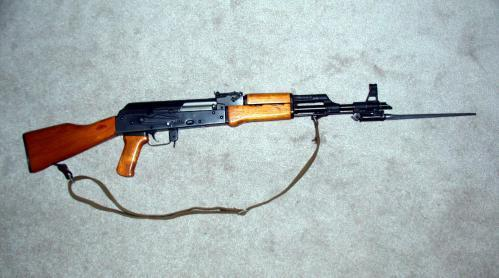

In [ ]:
load_img(x[0])

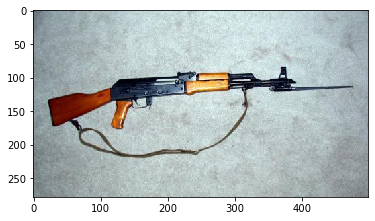

In [ ]:
plt.imshow(plt.imread(x[0]))

In [ ]:
all = './caltech/images'
train = './caltech/train'
temp = './caltech/temp'

valid = './caltech/valid'
test = './caltech/test'

In [ ]:
# 데이터 쪼개기

def split_dataset_into_test_and_train_sets(all_data_dir, training_data_dir, testing_data_dir, testing_data_pct):
    # Recreate testing and training directories
    if testing_data_dir.count('/') > 1:
        shutil.rmtree(testing_data_dir, ignore_errors=False)
        os.makedirs(testing_data_dir)
        print("Successfully cleaned directory " + testing_data_dir)
    else:
        print("Refusing to delete testing data directory " + testing_data_dir + " as we prevent you from doing stupid things!")

    if training_data_dir.count('/') > 1:
        shutil.rmtree(training_data_dir, ignore_errors=False)
        os.makedirs(training_data_dir)
        print("Successfully cleaned directory " + training_data_dir)
    else:
        print("Refusing to delete testing data directory " + training_data_dir + " as we prevent you from doing stupid things!")

    num_training_files = 0
    num_testing_files = 0

    for subdir, dirs, files in os.walk(all_data_dir):
        category_name = os.path.basename(subdir)

        # Don't create a subdirectory for the root directory
        print(category_name + " vs " + os.path.basename(all_data_dir))
        if category_name == os.path.basename(all_data_dir):
            continue

        training_data_category_dir = training_data_dir + '/' + category_name
        testing_data_category_dir = testing_data_dir + '/' + category_name

        if not os.path.exists(training_data_category_dir):
            os.mkdir(training_data_category_dir)

        if not os.path.exists(testing_data_category_dir):
            os.mkdir(testing_data_category_dir)

        for file in files:
            input_file = os.path.join(subdir, file)
            if np.random.rand(1) < testing_data_pct:
                shutil.copy(input_file, testing_data_dir + '/' + category_name + '/' + file)
                num_testing_files += 1
            else:
                shutil.copy(input_file, training_data_dir + '/' + category_name + '/' + file)
                num_training_files += 1

    print("Processed " + str(num_training_files) + " training files.")
    print("Processed " + str(num_testing_files) + " testing files.")

In [ ]:
# train / test & valid
split_dataset_into_test_and_train_sets(all, train, temp, 0.2)

Successfully cleaned directory ./caltech/temp
Successfully cleaned directory ./caltech/train
images vs images
001.ak47 vs images
002.american-flag vs images
003.backpack vs images
004.baseball-bat vs images
005.baseball-glove vs images
006.basketball-hoop vs images
007.bat vs images
008.bathtub vs images
009.bear vs images
010.beer-mug vs images
011.billiards vs images
012.binoculars vs images
013.birdbath vs images
014.blimp vs images
015.bonsai-101 vs images
016.boom-box vs images
017.bowling-ball vs images
018.bowling-pin vs images
019.boxing-glove vs images
020.brain-101 vs images
021.breadmaker vs images
022.buddha-101 vs images
023.bulldozer vs images
024.butterfly vs images
025.cactus vs images
026.cake vs images
027.calculator vs images
028.camel vs images
029.cannon vs images
030.canoe vs images
031.car-tire vs images
032.cartman vs images
033.cd vs images
034.centipede vs images
035.cereal-box vs images
036.chandelier-101 vs images
037.chess-board vs images
038.chimp vs image

In [ ]:
# test / valid
split_dataset_into_test_and_train_sets(temp, test, valid, 0.5)

Successfully cleaned directory ./caltech/valid
Successfully cleaned directory ./caltech/test
temp vs temp
001.ak47 vs temp
002.american-flag vs temp
003.backpack vs temp
004.baseball-bat vs temp
005.baseball-glove vs temp
006.basketball-hoop vs temp
007.bat vs temp
008.bathtub vs temp
009.bear vs temp
010.beer-mug vs temp
011.billiards vs temp
012.binoculars vs temp
013.birdbath vs temp
014.blimp vs temp
015.bonsai-101 vs temp
016.boom-box vs temp
017.bowling-ball vs temp
018.bowling-pin vs temp
019.boxing-glove vs temp
020.brain-101 vs temp
021.breadmaker vs temp
022.buddha-101 vs temp
023.bulldozer vs temp
024.butterfly vs temp
025.cactus vs temp
026.cake vs temp
027.calculator vs temp
028.camel vs temp
029.cannon vs temp
030.canoe vs temp
031.car-tire vs temp
032.cartman vs temp
033.cd vs temp
034.centipede vs temp
035.cereal-box vs temp
036.chandelier-101 vs temp
037.chess-board vs temp
038.chimp vs temp
039.chopsticks vs temp
040.cockroach vs temp
041.coffee-mug vs temp
042.coffin